The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Tensorflow version:  2.3.0
shape of train_images:  (60000, 28, 28)
type of train_images:  <class 'numpy.ndarray'>
shape of train_labels:  (60000,)
type of train_labels:  <class 'numpy.ndarray'>
All labels in the dataset:
 [0 1 2 3 4 5 6 7 8 9]


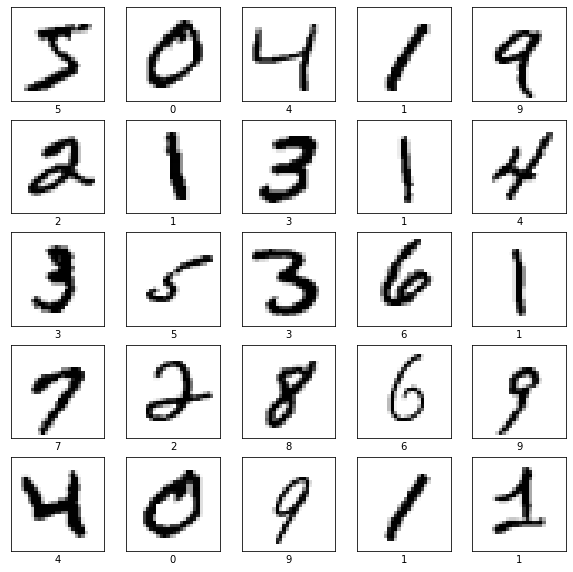

Model: "fcn"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
fcn_hidden_1 (Dense)         (None, 512)               401920    
_________________________________________________________________
fcn_output (Dense)           (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________
Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.8383 - accuracy: 0.7904 - val_loss: 0.4029 - val_accuracy: 0.8902
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3627 - accuracy: 0.8978 - val_loss:

Reusing TensorBoard on port 6006 (pid 3960), started 0:05:22 ago. (Use '!kill 3960' to kill it.)

Prediction for the first test image:  [9.1046262e-05 1.4097687e-08 8.8713125e-05 1.5127851e-03 3.9164632e-07
 5.3294843e-05 5.2559446e-10 9.9730492e-01 9.3857261e-06 9.3943020e-04]
Predicted class of the first test image:  7
True label of the first test image:  7
I want to make some addictional test
Predicted class of the first test image:  6
True label of the first test image:  5


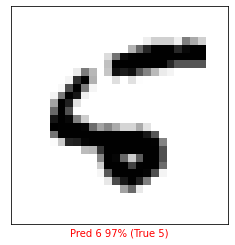

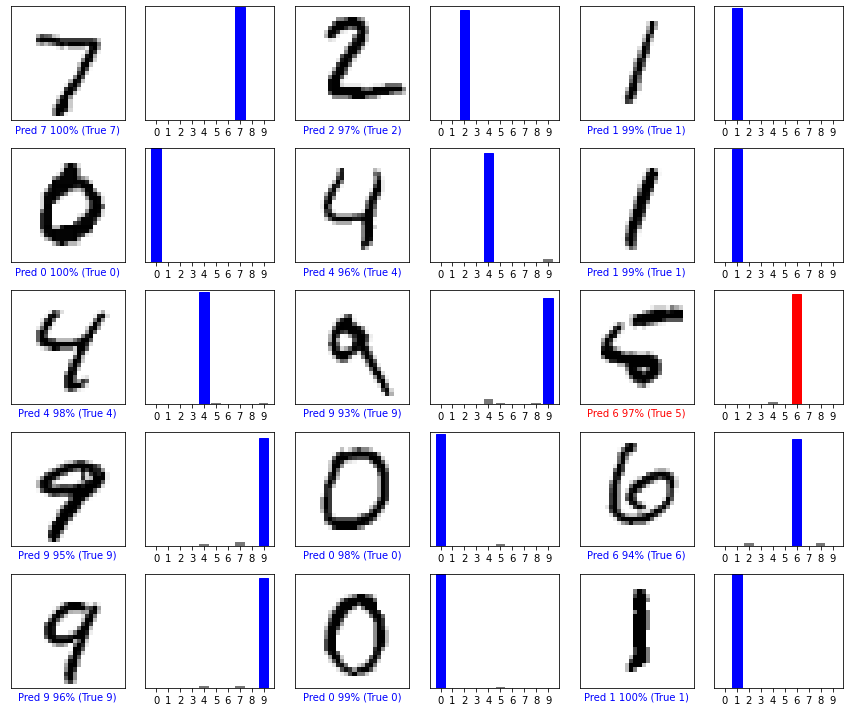

t1 (before reshape): 
 tf.Tensor(
[[ 46.027355   98.00142    96.1204    180.46776    33.22189  ]
 [163.85347   180.83167   187.32169   173.20561   108.02489  ]
 [234.58032    15.102396   56.868874   54.909485  111.42638  ]
 [122.296196   38.061646    9.7476015 130.02301   185.80978  ]
 [ 52.67764   214.82751    17.178057  197.23257    64.996    ]], shape=(5, 5), dtype=float32)
t1 (after reshape): 
 tf.Tensor(
[[[[ 46.027355 ]
   [ 98.00142  ]
   [ 96.1204   ]
   [180.46776  ]
   [ 33.22189  ]]

  [[163.85347  ]
   [180.83167  ]
   [187.32169  ]
   [173.20561  ]
   [108.02489  ]]

  [[234.58032  ]
   [ 15.102396 ]
   [ 56.868874 ]
   [ 54.909485 ]
   [111.42638  ]]

  [[122.296196 ]
   [ 38.061646 ]
   [  9.7476015]
   [130.02301  ]
   [185.80978  ]]

  [[ 52.67764  ]
   [214.82751  ]
   [ 17.178057 ]
   [197.23257  ]
   [ 64.996    ]]]], shape=(1, 5, 5, 1), dtype=float32)
out_single: 
 tf.Tensor(
[[[[ 19.44409 ]
   [110.34198 ]
   [ 80.401596]]

  [[ 69.86222 ]
   [126.021835]
   [139.

In [3]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

# Load the TensorBoard notebook extension
%load_ext tensorboard

import tensorflow as tf
from tensorflow import keras
from keras.layers import Dropout



import numpy as np
import matplotlib.pyplot as plt

import datetime



print("Tensorflow version: ", tf.__version__)
tf.executing_eagerly()  # enable eager execution



# Helper function for plotting predictions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} {:2.0f}% (True {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Load the dataset and split it to trainning set and test set
mnist = keras.datasets.mnist
# Split the dataset into trainning set and test set
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


print("shape of train_images: ", train_images.shape)
print("type of train_images: ", type(train_images))




print("shape of train_labels: ", train_labels.shape)
print("type of train_labels: ", type(train_labels))


def fcn(input_shape):
  """
  Define a shallow FCN
  Input:
    input_shape [tuple]: shape of input image (height, width, channel)
  Output:
    model (a tensorflow model instance)
  """
  
  # Input layer
  X_in = keras.layers.Input(shape=input_shape)
  X = keras.layers.Flatten()(X_in)

  # Hidden layer
  X = keras.layers.Dense(512, activation='relu', name="fcn_hidden_1")(X)

  # Hidden layer
  #X = keras.layers.Dense(512, activation='relu', name="fcn_hidden_2")(X)

  #X = keras.layers.Dropout(0.5)(X)

  # Output layer
  y = keras.layers.Dense(10, activation='softmax', name="fcn_output")(X)

  model = keras.Model(inputs=X_in, outputs=y, name="fcn")
  return model
class_names = np.unique(train_labels)
print("All labels in the dataset:\n", class_names)


plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


train_images, test_images = train_images / 255.0, test_images / 255.0

#train_images, test_images = (train_images*2 / 255.0) -1, (test_images*2 / 255.0)-1


train_images, test_images = train_images / 255.0, test_images / 255.0

#train_images, test_images = (train_images*2 / 255.0) -1, (test_images*2 / 255.0)-1


model_fcn = fcn((28, 28))
model_fcn.summary()



#sgd = keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adagrad = keras.optimizers.Adagrad(learning_rate=0.01)
#!rm -rf ./logs/ 
model_fcn.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


log_dir = "logs/fit/" + "fcn_m"
tensorboard_cb = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Fitting the dataset
model_fcn.fit(x=train_images, 
          y=train_labels, 
          epochs=5, 
          validation_data=(test_images, test_labels), 
          callbacks=[tensorboard_cb])

%tensorboard --logdir logs/fit/fcn_m

predictions = model_fcn.predict(test_images)

print("Prediction for the first test image: ", predictions[0])


print("Predicted class of the first test image: ", np.argmax(predictions[0]))
print("True label of the first test image: ", test_labels[0])



print("I want to make some addictional test")

plot_image(8, predictions[8], test_labels, test_images)
print("Predicted class of the first test image: ", np.argmax(predictions[8]))
print("True label of the first test image: ", test_labels[8])


# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



# Create a single-channel random tensor (i.e. a matrix) of size 5x5
t1 = tf.random.uniform(shape=(5, 5), minval=0, maxval=255, dtype=tf.dtypes.float32, seed=7)
print("t1 (before reshape): \n",t1)

# reshape t1 so that it can be fed to a Conv2D layer
# the 1st number of "shape" is the batch_size (the number of images fed to 
# the network at training time)
# the 2nd number is input's width which is 5 in this case
# the 3rd number is input's height (5 as well)
# the last number is input's depth which is 1
t1 = tf.reshape(t1, shape=[1, 5, 5, 1]) 

print("t1 (after reshape): \n",t1)

# Create a Conv2D layer whose weights are randomly initialized
# for testing the convolution operation, this layer has only 1 filter
# the filter has 1 kernel (due to input's depth of 1) of size 3x3
conv2d_single = keras.layers.Conv2D(filters=1, kernel_size=3, strides=(1, 1), padding='valid', name="conv2d_single")


out_single = conv2d_single(t1)
print("out_single: \n", out_single)


out_single_numpy = out_single.numpy().squeeze()
print("\nout_single_numpy (beautify): \n", out_single_numpy)




